# 속성 데이터 회귀 Template

# 데이터 준비

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!wget https://raw.githubusercontent.com/medicieducation/trainingcourse/master/bigdata/deeplearning/material/deep_learning/car_regression.csv

--2022-07-07 02:25:36--  https://raw.githubusercontent.com/medicieducation/trainingcourse/master/bigdata/deeplearning/material/deep_learning/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv.1’

car_regression.csv. 100%[===================>]  57.32K  --.-KB/s    in 0.01s   

2022-07-07 02:25:36 (5.21 MB/s) - ‘car_regression.csv.1’ saved [58697/58697]



In [6]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [9]:
print(train_x[:5])
print(train_y[:5])

[[ 1.48205303  1.48683159  1.31278487  1.62751548 -0.23246035  0.81993056
   1.          0.          0.        ]
 [ 1.48205303  1.18103289  1.18288491  1.74171339 -0.73991557 -0.53738692
   1.          0.          0.        ]
 [-0.86291079 -0.92133315 -0.94747438 -0.99197274  0.38373527  0.54846706
   0.          0.          1.        ]
 [ 0.30957112  0.64588517 -0.50581452  0.04404957  0.52872248  1.63432105
   1.          0.          0.        ]
 [ 1.48205303  1.07591459  2.48188447  1.64635225 -0.19621355 -1.6232409
   1.          0.          0.        ]]
[[-0.83868188]
 [-1.21023822]
 [ 0.77566635]
 [ 1.86471078]
 [-1.72272972]]


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 3s 75ms/step - loss: 0.7751 - mape: 107.7908 - val_loss: 0.8959 - val_mape: 82.9311
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6946 - mape: 97.7199 - val_loss: 0.8002 - val_mape: 74.6413
Epoch 3/1000
3/3 [==============================] -

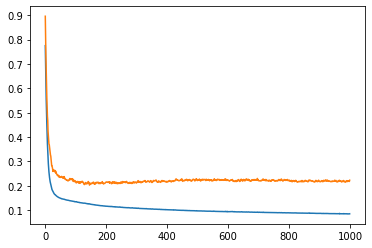

3/3 [==============================] - 0s 4ms/step - loss: 0.1255 - mape: 94.6612
loss= 0.12547360360622406
mape= 94.66116333007812


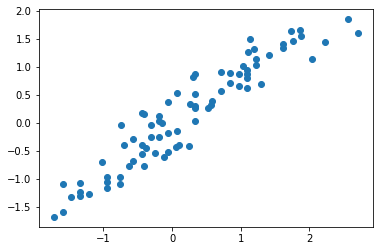

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(9,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()